In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('F:\Decision_tree_heart_desease\data\processed.cleveland.data')

In [3]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [4]:
df.drop(df[(df['ca']=='?') | (df['thal']=='?')].index,inplace=True)

>split the data into dependent and independent 

In [5]:
x=df.drop(columns='hd',axis=1).copy()

In [6]:
y=df['hd'].copy()

In [7]:
x=pd.get_dummies(x,columns=['sex','fbs','exang','ca', 'thal'],dtype=float)  #dtypes default to bool

>y the target variable has 5 unique valaue depending on sverity but classifieng them into 6 classes is clumsy lets take only has heart disesase or no heart disease

In [8]:
ind_y_not_0=y>0
y[ind_y_not_0]=1    #ind_y_not is array of true false which will be evaluated as index

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30) #default train_size=70:30

In [10]:
from sklearn.tree import DecisionTreeClassifier
D_C=DecisionTreeClassifier(random_state=40)   #default criterion='gini'  (entropy, logloss)
D_C.fit(x_train,y_train)

DecisionTreeClassifier(random_state=40)

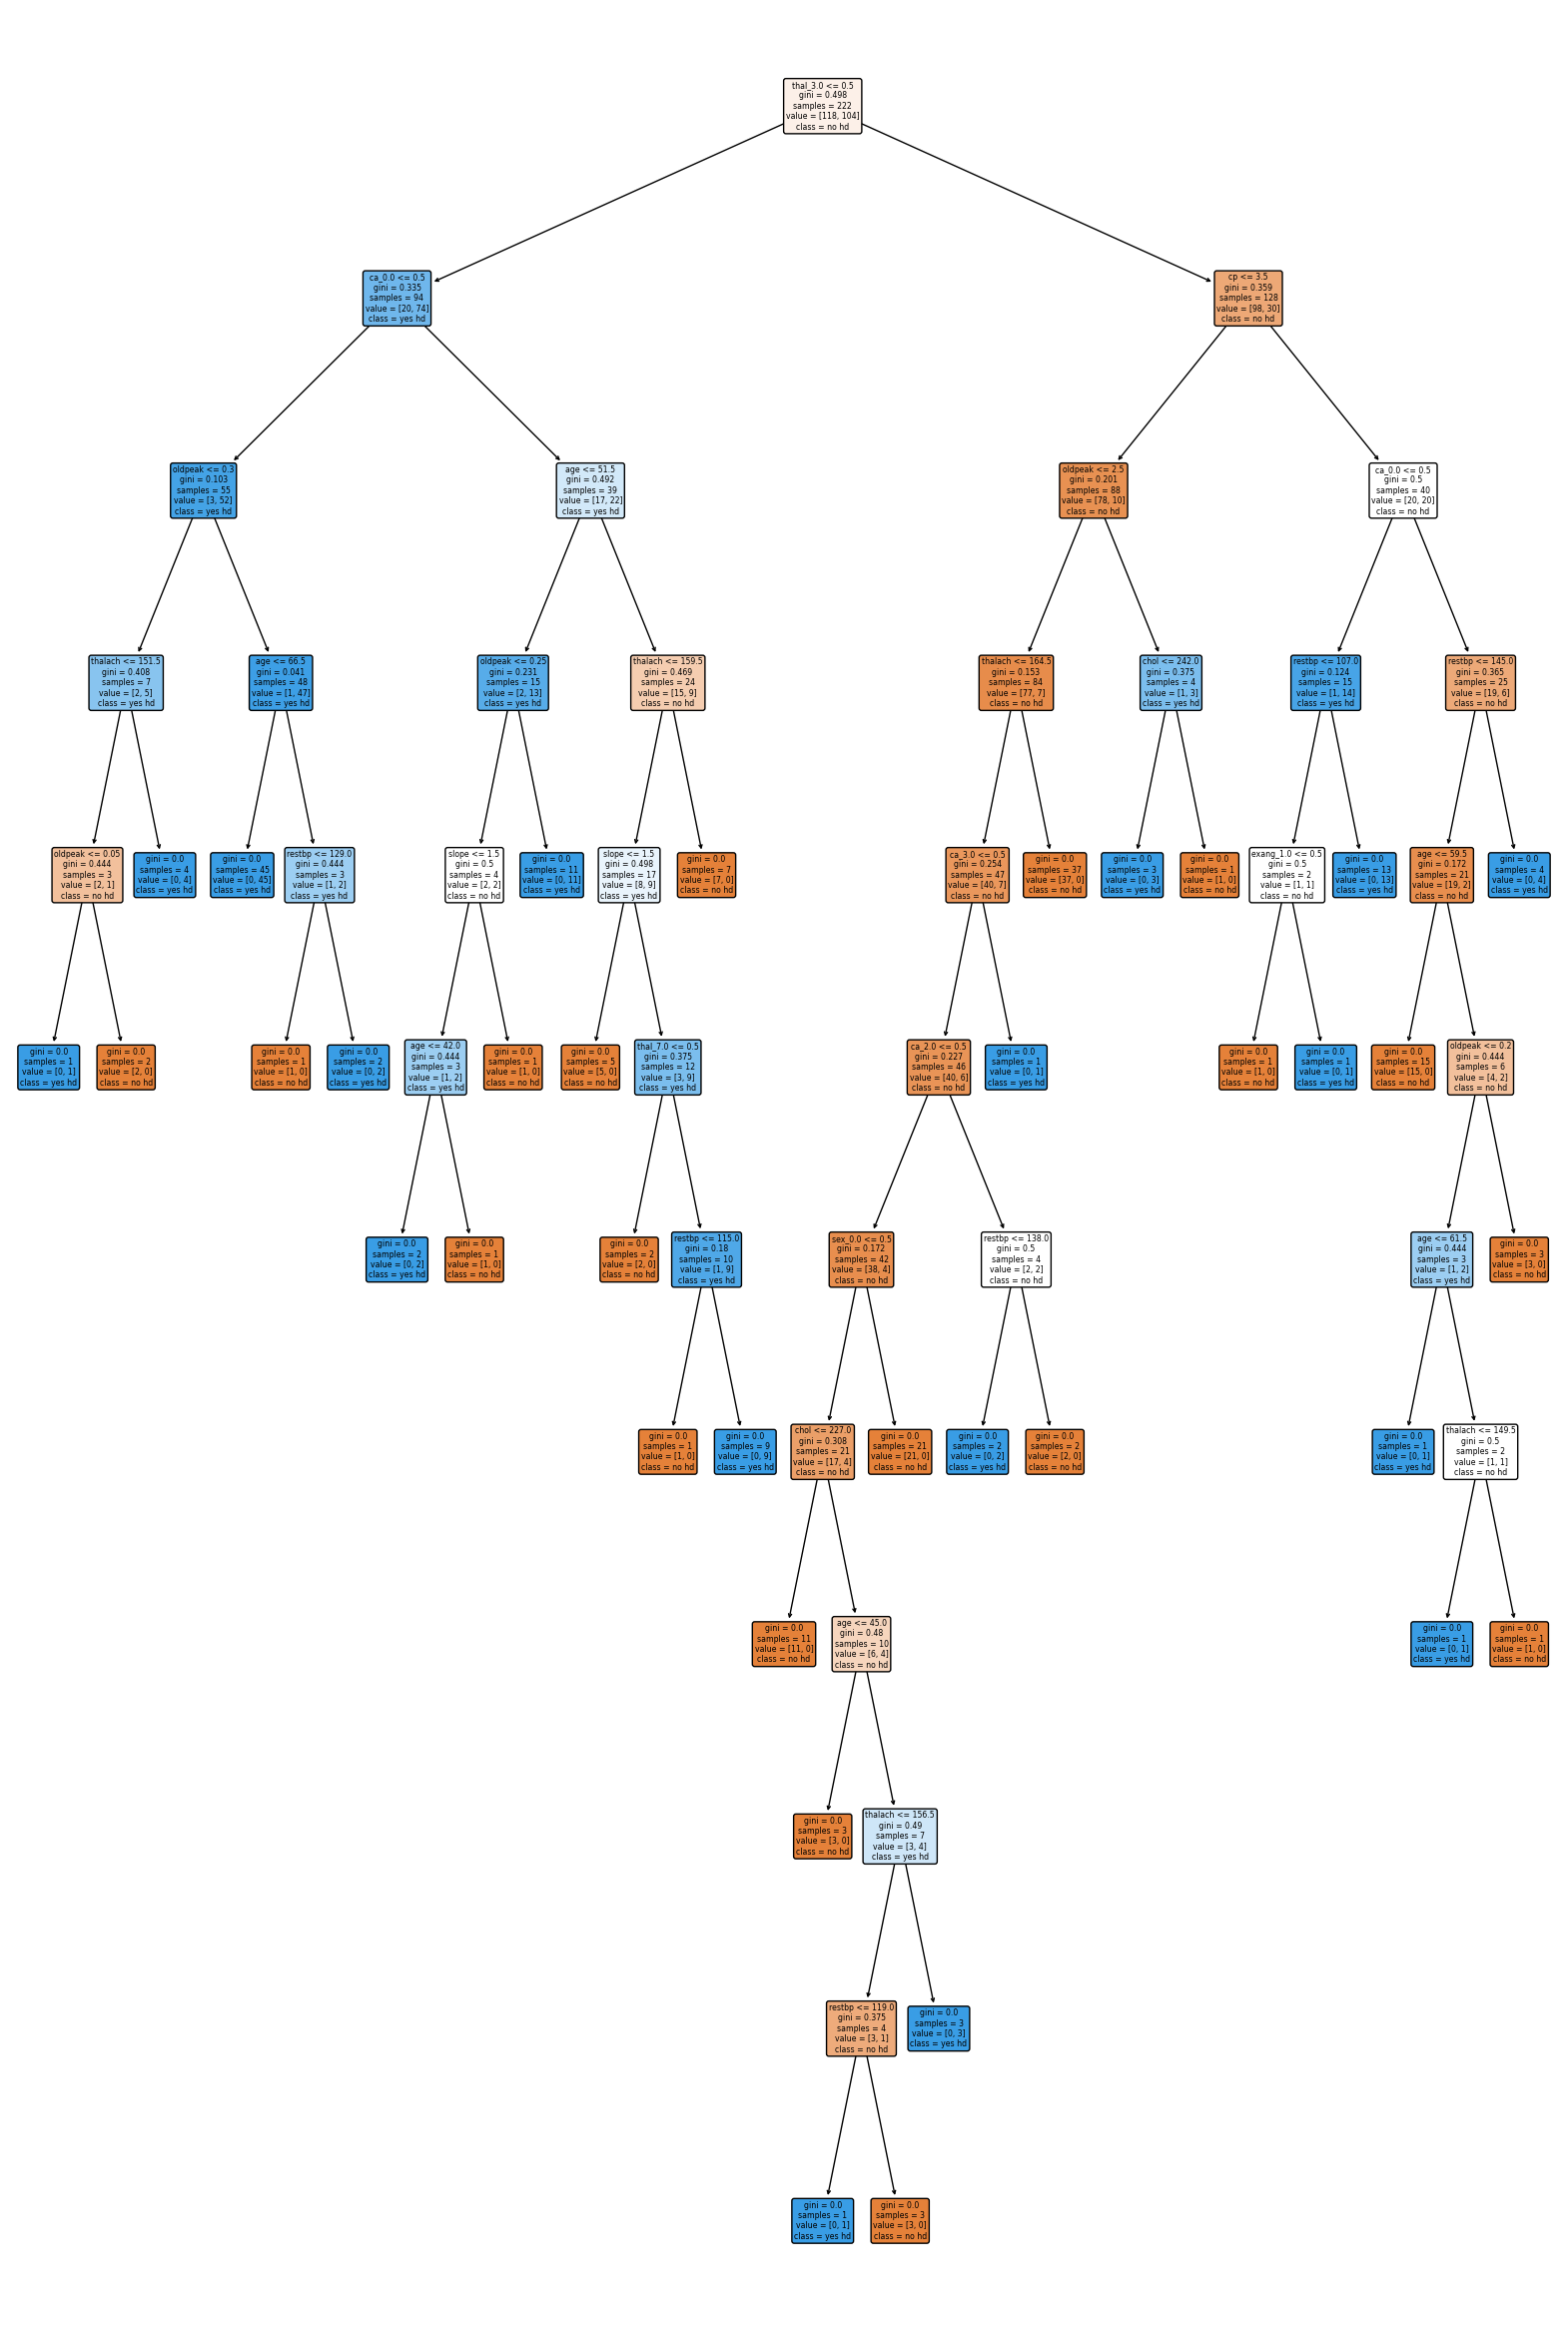

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,30))
plot_tree(D_C,filled=True,rounded=True,class_names=['no hd','yes hd'],feature_names=x.columns)
plt.show()

# other plots include PartialDependenceDisplay, plt.barh  etc

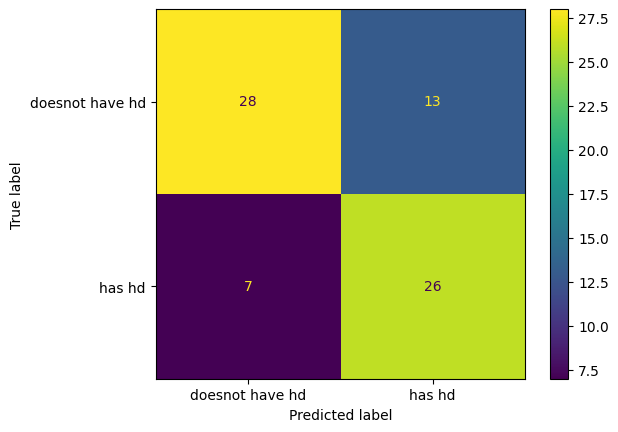

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(D_C,x_test,y_test,display_labels=['doesnot have hd','has hd'])
plt.show()

In [13]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,precision_recall_curve

In [14]:
print('acc :',accuracy_score(y_test,D_C.predict(x_test)))
print('prec :',precision_score(y_test,D_C.predict(x_test)))
print('f1 :',f1_score(y_test,D_C.predict(x_test)))
print('recall :',recall_score(y_test,D_C.predict(x_test)))

acc : 0.7297297297297297
prec : 0.6666666666666666
f1 : 0.7222222222222221
recall : 0.7878787878787878


In [15]:
D_C.predict(x_test)
D_C.predict_proba(x_test)[:,1]

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1.])

In [16]:
precision,recall,thresholds=precision_recall_curve(D_C.predict_proba(x_test)[:,1],y_test)

In [17]:
precision

array([0.52702703, 0.78787879, 1.        ])

In [18]:
recall

array([1.        , 0.66666667, 0.        ])

In [19]:
thresholds

array([0, 1], dtype=int64)

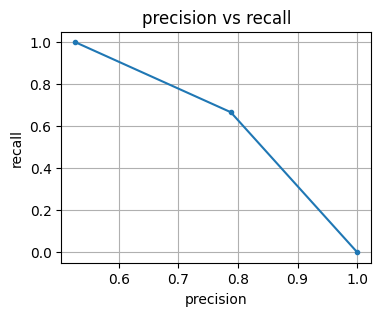

In [20]:
plt.figure(figsize=(4,3))
plt.plot(precision,recall,marker='.')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('precision vs recall')
plt.grid()
plt.show()

In [21]:
path=D_C.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]   #ignore last alpha its correspond to tree with 1 node
ccp_alphas

array([0.        , 0.003003  , 0.0042042 , 0.00441066, 0.0045045 ,
       0.00514801, 0.00557717, 0.00642309, 0.00660661, 0.00675676,
       0.00810811, 0.01216216, 0.0152027 , 0.01528802, 0.0201028 ,
       0.02477906, 0.02989706, 0.0387918 ])

>so we have array of alphas so we will train 1 Decision tree with each alpha

In [22]:
path.impurities

array([0.        , 0.00600601, 0.01441441, 0.02323574, 0.03224474,
       0.04254076, 0.05927226, 0.11708007, 0.12368667, 0.13044343,
       0.13855154, 0.1507137 , 0.18111911, 0.19640712, 0.21650992,
       0.24128898, 0.27118604, 0.34876965, 0.49801153])

In [23]:
D_Cs=[]
for ccp_a in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=12,ccp_alpha=ccp_a,min_samples_leaf=5)
    clf_dt.fit(x_train,y_train)
    D_Cs.append(clf_dt)

>now lets graph the accuracy of the trees using training dataset and testing dataset as a function of alpha

In [24]:
train_scores=[clf_dt.score(x_train,y_train) for clf_dt in D_Cs] # gets training accuracy for each model
test_scores=[clf_dt.score(x_test,y_test) for clf_dt in D_Cs]    # gets testing accuracy for each model

In [25]:
print(train_scores)
print(test_scores)

[0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.9009009009009009, 0.8918918918918919, 0.8603603603603603, 0.8603603603603603, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.7747747747747747]
[0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7702702702702703, 0.7567567567567568, 0.7702702702702703, 0.7702702702702703, 0.7567567567567568, 0.7567567567567568, 0.7567567567567568, 0.7432432432432432]


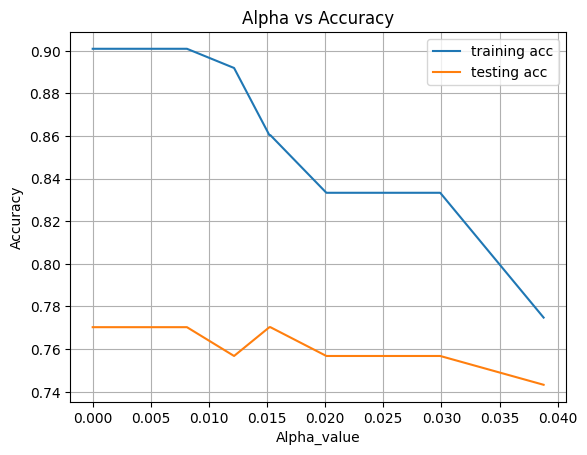

In [26]:
fig,axes=plt.subplots()
axes.plot(ccp_alphas,train_scores)
axes.plot(ccp_alphas,test_scores)
axes.set_xlabel('Alpha_value')
axes.set_ylabel('Accuracy')
axes.set_title('Alpha vs Accuracy')
plt.legend(['training acc','testing acc']) #there is other way of legend arg
plt.grid()
plt.show()

>alpha=0.0248-.030 should be best alpha

>we done this on only 1 pair of train and test , but lets do it for different
:cross validation

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
#create an array to store result of scores for each alpha
alpha_loop_values=[]

for ccp_a in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=40,ccp_alpha=ccp_a,min_samples_leaf=8)
    scores=cross_val_score(clf_dt,x,y,cv=5)
    alpha_loop_values.append([ccp_a,np.mean(scores),np.std(scores)])

alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_acc','std_acc'])

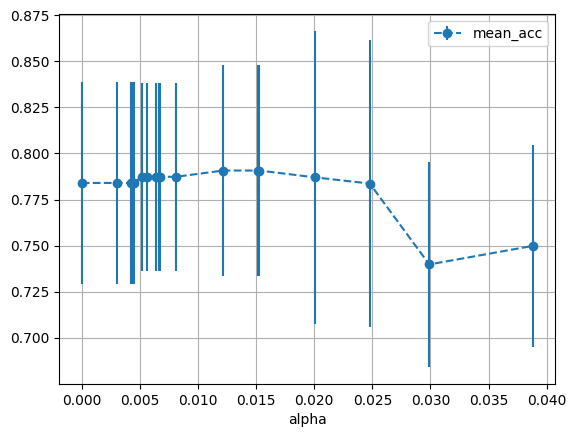

In [29]:
# for i in alpha_loop_values:
alpha_results.plot(x='alpha',y='mean_acc',yerr='std_acc',marker='o',linestyle='--')
plt.legend()
plt.grid()

In [30]:
alpha_results.iloc[alpha_results['mean_acc'].idxmax()]

alpha       0.012162
mean_acc    0.790734
std_acc     0.057396
Name: 11, dtype: float64

In [31]:
ideal_alpha=alpha_results.iloc[alpha_results['mean_acc'].idxmax()]['alpha']
ideal_alpha

0.012162162162162161

>now we will train the model again with best alpha

In [32]:
clf_dt_pruned=DecisionTreeClassifier(random_state=36,ccp_alpha=ideal_alpha)
clf_dt_pruned.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012162162162162161, random_state=36)

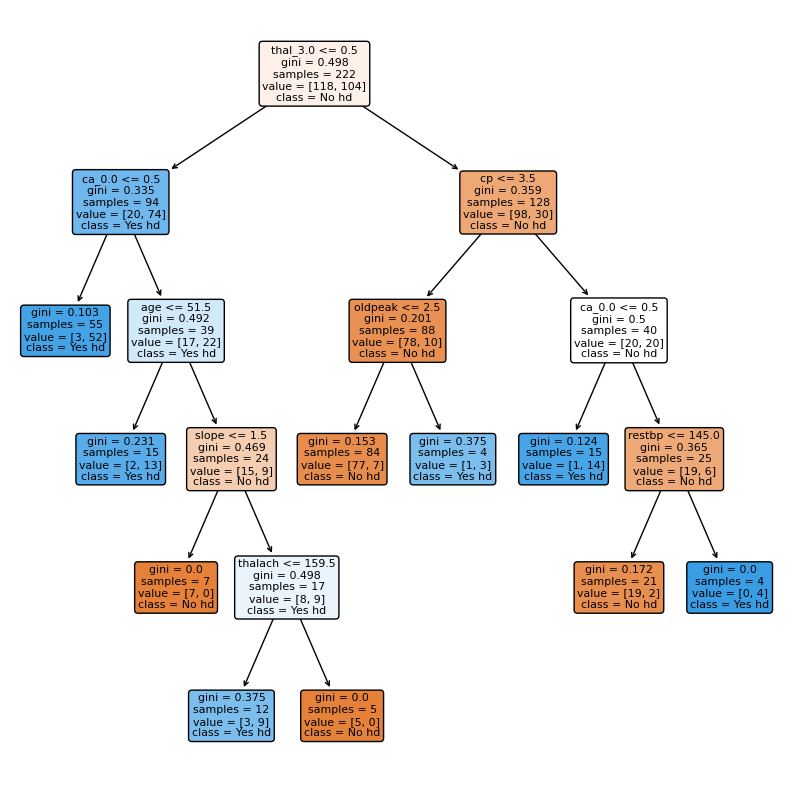

In [33]:
plt.figure(figsize=(10,10))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=['No hd','Yes hd'],feature_names=x.columns)
plt.show()

In [34]:
y_pred=clf_dt_pruned.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


In [36]:
accuracy_score(y_test,y_pred)

0.7162162162162162

In [37]:
confusion_matrix(y_test,y_pred)

array([[26, 15],
       [ 6, 27]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71        41
           1       0.64      0.82      0.72        33

    accuracy                           0.72        74
   macro avg       0.73      0.73      0.72        74
weighted avg       0.74      0.72      0.72        74



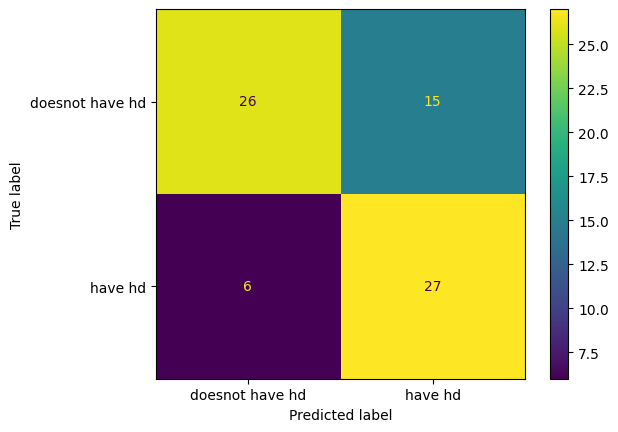

In [39]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned,x_test,y_test,display_labels=['doesnot have hd','have hd'])